# Esercitazione propedeutica – Reti Neurali per Regressione

Obiettivo: valutare l'effetto del numero di neuroni nello strato nascosto
sull'errore di approssimazione di una rete neurale feedforward.


Importiamo le librerie necessarie

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Funzione: caricamento e pulizzia dataset
Carica dataset da file txt gestendo:
- separatore a virgola
- punti decimali
- caratteri NULL
- righe malformate

In [5]:
def load_dataset(path):

    with open(path, "r", encoding="utf-8", errors="ignore") as f:     # Lettura file come testo e rimozione di eventuali caratteri NULL
        clean_lines = [line.replace("\x00", "") for line in f]

    from io import StringIO
    data_str = "".join(clean_lines)
    
    df = pd.read_csv(                                                 # Creazione DataFrame da stringa pulita
        StringIO(data_str),
        sep=',',                                                      # separatore di colonna
        decimal='.',                                                  # separatore decimale
        header=None,
        engine='python'
    )
    
    data = df.to_numpy(dtype=float)                                   # Conversione a NumPy 
    
    return data

## Funzione: Esperimento completo
Esegue l'intero esperimento di regressione:
- split train/test
- training MLP con neuroni 5 → 50
- calcolo MSE

In [7]:
def run_experiment(dataset, dataset_name):
    X = dataset[:, :-1]                                          # separazione ingressi e target
    y = dataset[:, -1]
    
    scaler_X = StandardScaler()                                  # normalizzazione
    scaler_y = StandardScaler()
    
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(         # split 70% training - 30% test
        X, y, test_size = 0.3, random_state = 42
    )
    
    neurons = range(5, 51, 5)
    mse_train = []
    mse_test = []
    
    for n in neurons:
        model = MLPRegressor(
            hidden_layer_sizes=(n,),                            # un solo hidden layer
            activation='logistic',                              # funzione sigmoide
            solver='adam',
            max_iter = 2000,
            random_state = 42
        )
        
        model.fit(X_train, y_train)
        
        mse_train.append(
            mean_squared_error(y_train, model.predict(X_train))
        )
        mse_test.append(
            mean_squared_error(y_test, model.predict(X_test))
        )

    print(f"\nRisultati - {dataset_name}")                      # Stampa tabella dei risulatti
    for n, tr, te in zip(neurons, mse_train, mse_test):
        print(f"Neuroni: {n:2d} | MSE Train: {tr:.4f} | MSE Test: {te:.4f}")
    
    return neurons, mse_train, mse_test

## Caricamento dei due dataset

In [9]:
wizmir = load_dataset(
    r"C:\Users\emanu\OneDrive\Desktop\wizmir.txt"
)

ele2 = load_dataset(
    r"C:\Users\emanu\OneDrive\Desktop\ele-2.txt"
)

print("WIZMIR shape:", wizmir.shape)
print("ELE-2 shape:", ele2.shape)

WIZMIR shape: (1461, 10)
ELE-2 shape: (1056, 5)


In [10]:
print(wizmir[:5])

[[88.2  57.2  53.6   0.   29.96  7.3   9.09 16.1  34.28 74.3 ]
 [88.   58.6  54.9   0.   29.84  7.3  10.7  18.3  34.28 75.2 ]
 [91.6  62.1  60.4   0.   29.76  7.2   8.29 18.3  34.28 76.1 ]
 [64.4  42.8  37.4   0.2  30.15  7.8  21.1  27.5  34.28 47.1 ]
 [94.1  72.3  46.8   0.   29.86  7.2  17.2  25.3  34.28 83.9 ]]


In [11]:
print(ele2[:5])

[[1.10000000e+01 3.30000000e+00 5.49599990e+01 5.50000000e+01
  4.32933008e+03]
 [4.00000000e+00 1.20000000e+00 1.99800000e+01 4.00000000e+01
  2.01643994e+03]
 [9.00000000e-01 2.70000000e-01 4.50000000e+00 1.80000000e+00
  2.49419998e+02]
 [2.00000000e+00 1.20000000e+00 1.99800000e+01 1.00000000e+01
  1.04421997e+03]
 [2.00000000e+00 1.80000000e+00 1.99800000e+01 3.00000000e+01
  1.76192004e+03]]


## Esecuzione regressione

In [13]:
neur_w, mse_tr_w, mse_te_w = run_experiment(wizmir, "WIZMIR")

neur_e, mse_tr_e, mse_te_e = run_experiment(ele2, "ELE-2")


Risultati - WIZMIR
Neuroni:  5 | MSE Train: 0.0423 | MSE Test: 0.0380
Neuroni: 10 | MSE Train: 0.0207 | MSE Test: 0.0194
Neuroni: 15 | MSE Train: 0.0155 | MSE Test: 0.0141
Neuroni: 20 | MSE Train: 0.0130 | MSE Test: 0.0123
Neuroni: 25 | MSE Train: 0.0154 | MSE Test: 0.0144
Neuroni: 30 | MSE Train: 0.0131 | MSE Test: 0.0124
Neuroni: 35 | MSE Train: 0.0106 | MSE Test: 0.0101
Neuroni: 40 | MSE Train: 0.0114 | MSE Test: 0.0110
Neuroni: 45 | MSE Train: 0.0101 | MSE Test: 0.0097
Neuroni: 50 | MSE Train: 0.0133 | MSE Test: 0.0128

Risultati - ELE-2
Neuroni:  5 | MSE Train: 0.0425 | MSE Test: 0.0348
Neuroni: 10 | MSE Train: 0.0317 | MSE Test: 0.0266
Neuroni: 15 | MSE Train: 0.0277 | MSE Test: 0.0243
Neuroni: 20 | MSE Train: 0.0275 | MSE Test: 0.0246
Neuroni: 25 | MSE Train: 0.0211 | MSE Test: 0.0192
Neuroni: 30 | MSE Train: 0.0251 | MSE Test: 0.0230
Neuroni: 35 | MSE Train: 0.0212 | MSE Test: 0.0204
Neuroni: 40 | MSE Train: 0.0232 | MSE Test: 0.0223
Neuroni: 45 | MSE Train: 0.0275 | MSE Test:

## Grafico dataset WIZMIR

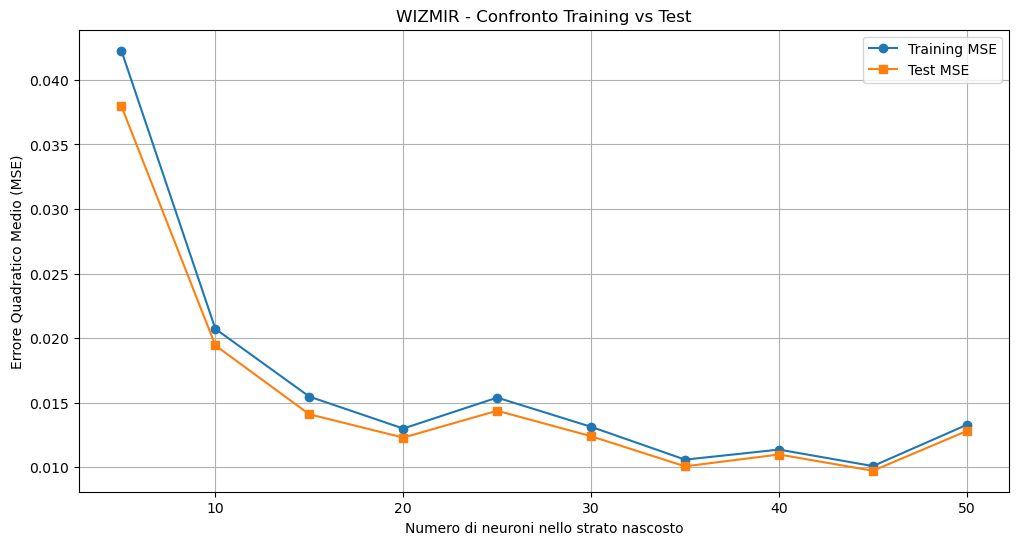

In [38]:
plt.figure(figsize=(12,6))
plt.plot(neur_w, mse_tr_w, marker='o', label="Training MSE")
plt.plot(neur_w, mse_te_w, marker='s', label="Test MSE")
plt.xlabel("Numero di neuroni nello strato nascosto")
plt.ylabel("Errore Quadratico Medio (MSE)")
plt.title("WIZMIR - Confronto Training vs Test")
plt.legend()
plt.grid(True)
plt.show()

## Grafico dataset ELE-2

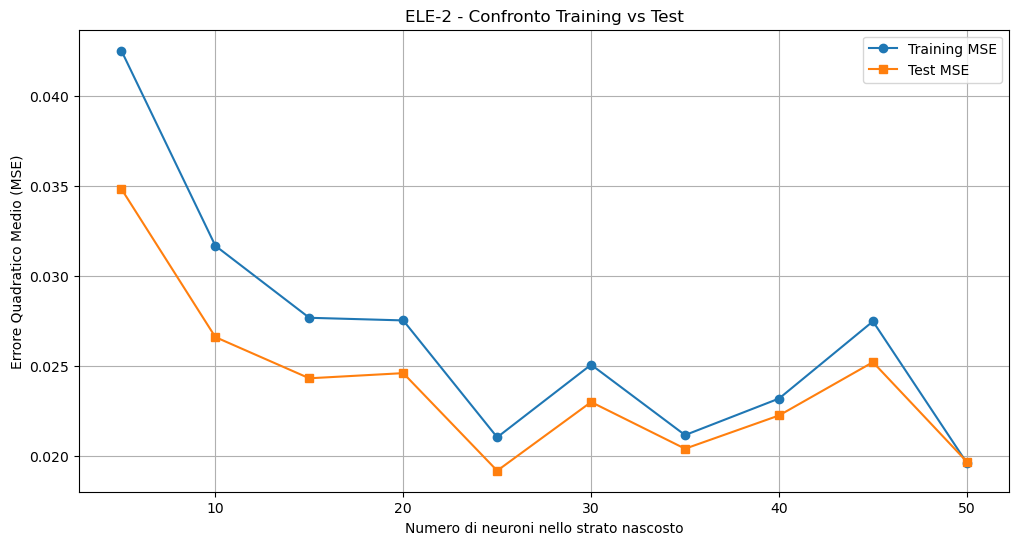

In [36]:
plt.figure(figsize=(12,6))
plt.plot(neur_e, mse_tr_e, marker='o', label="Training MSE")
plt.plot(neur_e, mse_te_e, marker='s', label="Test MSE")
plt.xlabel("Numero di neuroni nello strato nascosto")
plt.ylabel("Errore Quadratico Medio (MSE)")
plt.title("ELE-2 - Confronto Training vs Test")
plt.legend()
plt.grid(True)
plt.show()